In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)

df = pd.read_csv("/content/web traffic analytics.csv")

df.head()

,Date,Source,Device,Sessions,Users,Pageviews,Transactions,Revenue
0,01-01-2023,Organic,Mobile,150,120,400,5,250
1,01-01-2023,Organic,Desktop,90,75,310,3,180
2,01-01-2023,Paid,Mobile,80,70,290,4,240
3,01-01-2023,Paid,Desktop,60,55,220,5,300
4,02-01-2023,Direct,Mobile,60,50,150,2,90


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44 non-null     object
 1   Source        44 non-null     object
 2   Device        44 non-null     object
 3   Sessions      44 non-null     int64 
 4   Users         44 non-null     int64 
 5   Pageviews     44 non-null     int64 
 6   Transactions  44 non-null     int64 
 7   Revenue       44 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.9+ KB


In [4]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,44,15,01-01-2023,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,44,4,Organic,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device,44,2,Mobile,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sessions,44.0,NaN,NaN,NaN,101.25,43.02683,40.0,68.75,90.0,132.5,190.0
Users,44.0,NaN,NaN,NaN,85.977273,35.413497,35.0,58.75,77.5,115.0,160.0
Pageviews,44.0,NaN,NaN,NaN,289.318182,110.230155,140.0,190.0,275.0,352.5,520.0
Transactions,44.0,NaN,NaN,NaN,3.818182,2.315496,1.0,2.0,4.0,5.0,9.0
Revenue,44.0,NaN,NaN,NaN,198.75,117.518554,40.0,88.75,200.0,300.0,440.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

num_cols = ['Sessions', 'Users', 'Pageviews', 'Transactions', 'Revenue']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          36 non-null     datetime64[ns]
 1   Source        44 non-null     object        
 2   Device        44 non-null     object        
 3   Sessions      44 non-null     int64         
 4   Users         44 non-null     int64         
 5   Pageviews     44 non-null     int64         
 6   Transactions  44 non-null     int64         
 7   Revenue       44 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 2.9+ KB


In [6]:
df['ConversionRate'] = df['Transactions'] / df['Sessions']
df['RevenuePerSession'] = df['Revenue'] / df['Sessions']
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.to_period("M").astype(str)

df.head()


,Date,Source,Device,Sessions,Users,Pageviews,Transactions,Revenue,ConversionRate,RevenuePerSession,Day,Month
0,2023-01-01,Organic,Mobile,150,120,400,5,250,0.033333,1.666667,Sunday,2023-01
1,2023-01-01,Organic,Desktop,90,75,310,3,180,0.033333,2.000000,Sunday,2023-01
2,2023-01-01,Paid,Mobile,80,70,290,4,240,0.050000,3.000000,Sunday,2023-01
3,2023-01-01,Paid,Desktop,60,55,220,5,300,0.083333,5.000000,Sunday,2023-01
4,2023-02-01,Direct,Mobile,60,50,150,2,90,0.033333,1.500000,Wednesday,2023-02


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)

df = pd.read_csv("/content/web traffic analytics.csv")

df.head()

,Date,Source,Device,Sessions,Users,Pageviews,Transactions,Revenue
0,01-01-2023,Organic,Mobile,150,120,400,5,250
1,01-01-2023,Organic,Desktop,90,75,310,3,180
2,01-01-2023,Paid,Mobile,80,70,290,4,240
3,01-01-2023,Paid,Desktop,60,55,220,5,300
4,02-01-2023,Direct,Mobile,60,50,150,2,90


In [10]:
total_sessions = df['Sessions'].sum()
total_users = df['Users'].sum()
total_pageviews = df['Pageviews'].sum()
total_transactions = df['Transactions'].sum()
total_revenue = df['Revenue'].sum()

total_sessions, total_users, total_pageviews, total_transactions, total_revenue


(np.int64(4455),
 np.int64(3783),
 np.int64(12730),
 np.int64(168),
 np.int64(8745))

In [11]:
traffic_by_source = df.groupby('Source')[['Sessions', 'Users', 'Pageviews']].sum().sort_values('Sessions', ascending=False)
traffic_by_source


,Sessions,Users,Pageviews
Source,,,
Organic,2065,1735,5860
Paid,905,785,3000
Social,830,708,2140
Direct,655,555,1730


In [12]:
rev_by_source = df.groupby('Source')['Revenue'].sum().sort_values(ascending=False)
rev_by_source


,Revenue
Source,
Organic,4530
Paid,2620
Direct,805
Social,790


In [14]:
df['ConversionRate'] = df['Transactions'] / df['Sessions']
conversion_by_source = df.groupby('Source')['ConversionRate'].mean().sort_values(ascending=False)
conversion_by_source

,ConversionRate
Source,
Paid,0.050469
Organic,0.043152
Direct,0.023037
Social,0.022583


In [15]:
device_performance = df.groupby('Device')[['Sessions','Transactions','Revenue']].sum()
device_performance['ConversionRate'] = device_performance['Transactions'] / device_performance['Sessions']
device_performance


,Sessions,Transactions,Revenue,ConversionRate
Device,,,,
Desktop,1370,53,3020,0.038686
Mobile,3085,115,5725,0.037277


In [16]:
daily_trend = df.groupby('Date')[['Sessions', 'Revenue']].sum()
daily_trend.head()


,Sessions,Revenue
Date,,
01-01-2023,380,970
02-01-2023,300,430
03-01-2023,215,600
04-01-2023,280,550
05-01-2023,285,420


In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.to_period("M").astype(str)

rev_by_day = df.groupby('Day')['Revenue'].sum().sort_values(ascending=False)
rev_by_day

,Revenue
Day,
Wednesday,1785
Sunday,1660
Friday,1055
Saturday,850
Thursday,670
Tuesday,525
Monday,420


In [19]:
rev_by_month = df.groupby('Month')['Revenue'].sum().sort_values()
rev_by_month


,Revenue
Month,
2023-07,300
2023-05,420
2023-02,430
2023-12,465
2023-08,525
2023-04,550
2023-09,590
2023-03,600
2023-06,670


In [20]:
top_days = df.groupby('Date')['Sessions'].sum().sort_values(ascending=False).head(5)
top_days


,Sessions
Date,
2023-10-01,390
2023-01-01,380
2023-11-01,340
2023-06-01,325
2023-02-01,300


In [22]:
df['RevenuePerSession'] = df['Revenue'] / df['Sessions']
rps_by_source = df.groupby('Source')['RevenuePerSession'].mean().sort_values(ascending=False)
rps_by_source

,RevenuePerSession
Source,
Paid,2.942266
Organic,2.228051
Direct,1.227746
Social,0.991016


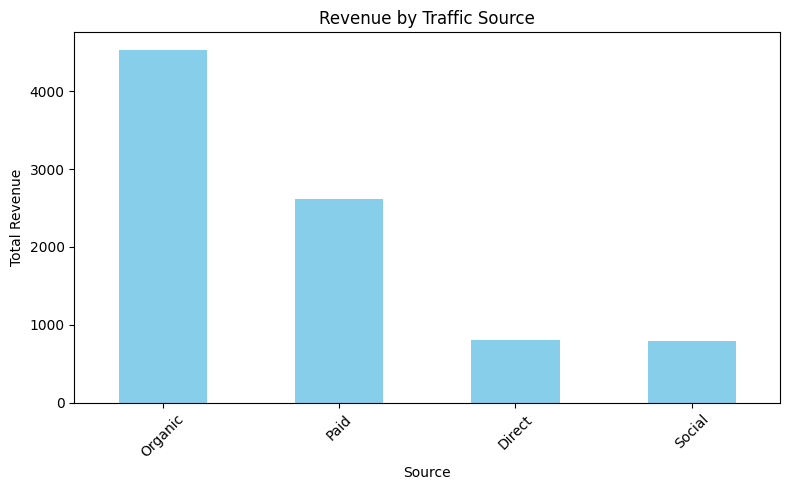

In [23]:
rev_by_source.plot(kind='bar', color='skyblue')
plt.title("Revenue by Traffic Source")
plt.xlabel("Source")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


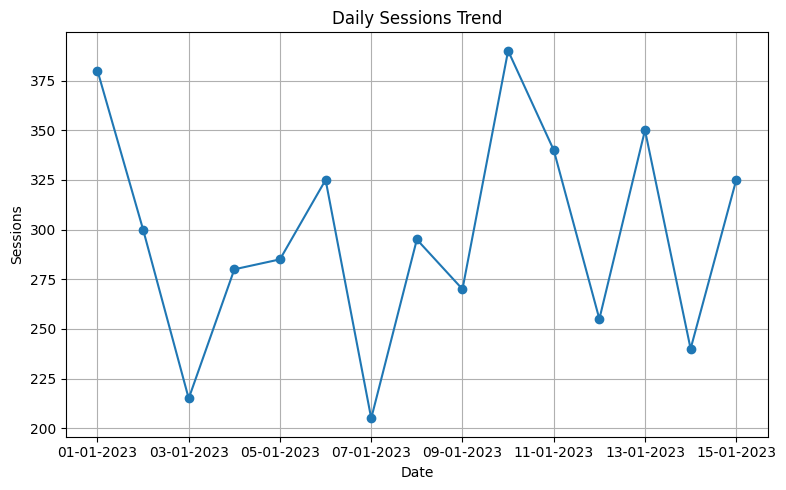

In [24]:
daily_trend['Sessions'].plot(kind='line', marker='o')
plt.title("Daily Sessions Trend")
plt.xlabel("Date")
plt.ylabel("Sessions")
plt.grid(True)
plt.tight_layout()
plt.show()


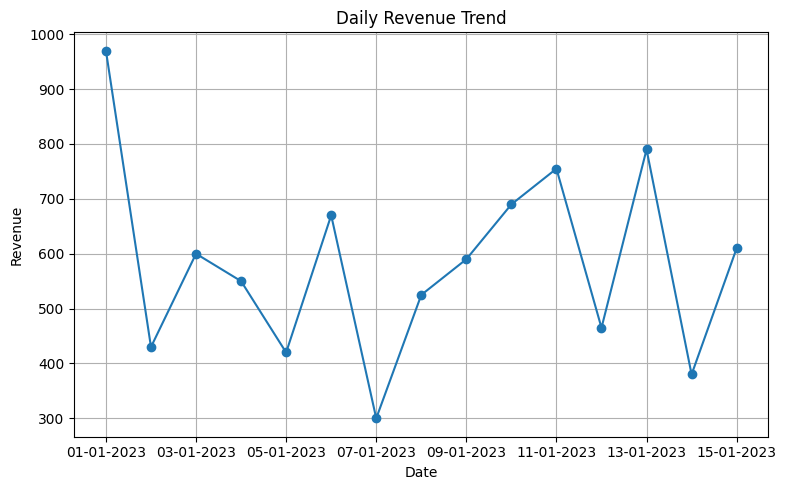

In [25]:
daily_trend['Revenue'].plot(kind='line', marker='o')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


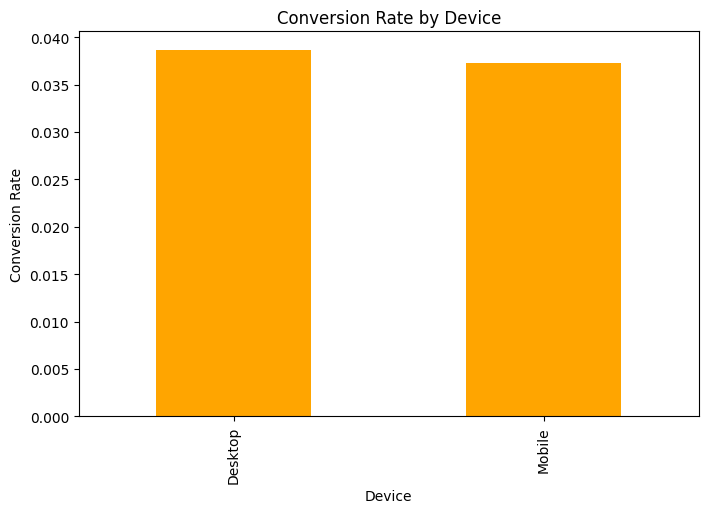

In [26]:
device_performance['ConversionRate'].plot(kind='bar', color='orange')
plt.title("Conversion Rate by Device")
plt.xlabel("Device")
plt.ylabel("Conversion Rate")
plt.show()


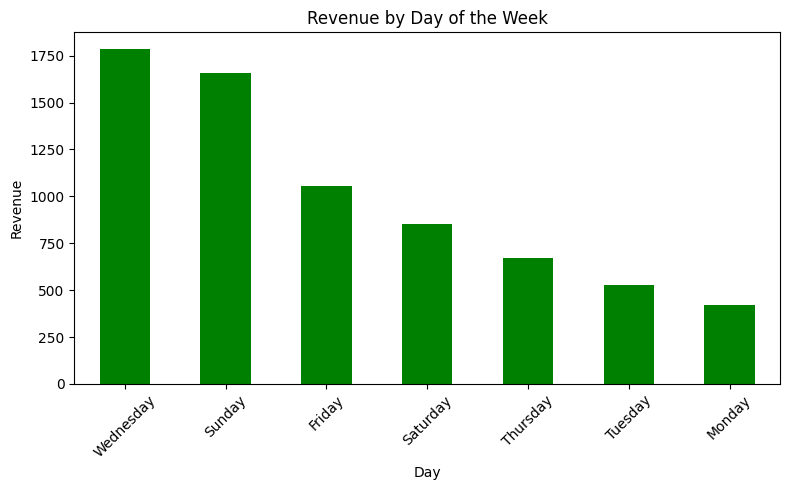

In [27]:
rev_by_day.plot(kind='bar', color='green')
plt.title("Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


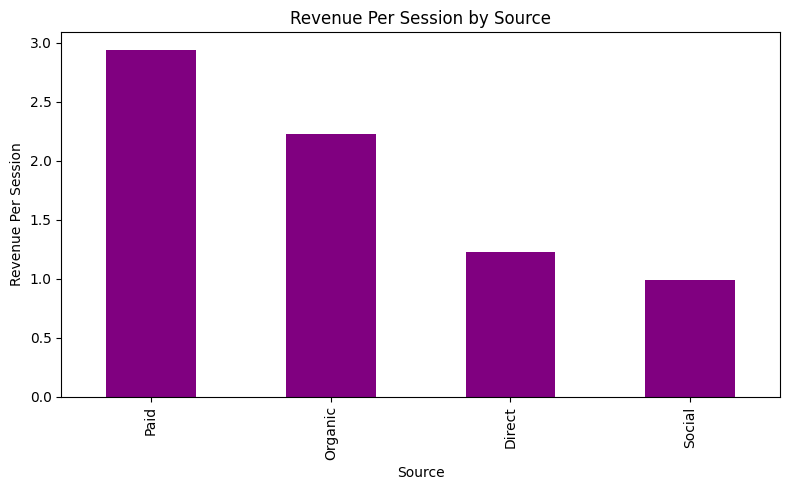

In [28]:
rps_by_source.plot(kind='bar', color='purple')
plt.title("Revenue Per Session by Source")
plt.xlabel("Source")
plt.ylabel("Revenue Per Session")
plt.tight_layout()
plt.show()


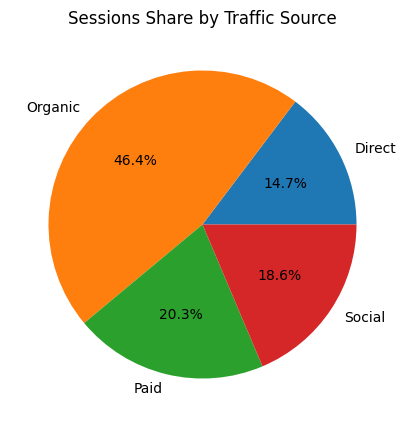

In [29]:
df.groupby('Source')['Sessions'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sessions Share by Traffic Source")
plt.ylabel("")
plt.show()
